In [156]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [157]:
# Read the City and Ride Data

city_data_one = pd.read_csv("data/city_data.csv") # returns 120 rows
ride_data_two = pd.read_csv("data/ride_data.csv")

In [158]:
#total number of rides in each city - 120 cities
rides_per_city_df = pd.DataFrame({"num_rides":combined_city_ride_df.groupby("city")["ride_id"].count()})
rides_per_city_df.head(2)

#average fares for each city - 120 cities
rides_per_city_df["avg_fare"] = combined_city_ride_df.groupby("city")["fare"].sum()/rides_per_city_df["num_rides"]
rides_per_city_df.head(2)


#merging all the City type(city_date_one-120 entiries), avg fare and driver count into one table
final_city_df = pd.merge(city_data_one, rides_per_city_df, how='left',on='city')
final_city_df.head()

,city,driver_count,type,num_rides,avg_fare
0,Richardfort,38,Urban,28,22.373214
1,Williamsstad,59,Urban,23,24.362174
2,Port Angela,67,Urban,19,23.836842
3,Rodneyfort,34,Urban,23,28.616957
4,West Robert,39,Urban,31,25.123871


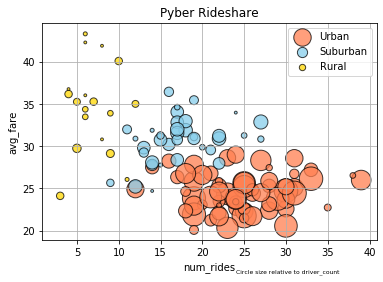

In [170]:
#to show different type of cities - x axis, y axis and sample size according to # of rides, avg fare and driver_count

#finding the dataframe to be for urban cities
urban_df = pd.DataFrame(final_city_df[final_city_df['type'] == 'Urban'])

#finding the dataframe to be for Suburban cities
suburban_df = pd.DataFrame(final_city_df[final_city_df['type'] == 'Suburban'])

#finding the dataframe to be for Rural cities
rural_df = pd.DataFrame(final_city_df[final_city_df['type'] == 'Rural'])

#===============================================================================================================
#num rides for urban cities
urban_num_rides = urban_df["num_rides"]

#num of driver count for urban cities
urban_driver_count = urban_df["driver_count"]

#avg fare for urban cities 
urban_fare = urban_df["avg_fare"]

#===============================================================================================================
#num rides for Suburban cities
suburban_num_rides = suburban_df["num_rides"]

#num of driver count for urban cities
suburban_driver_count = suburban_df["driver_count"]

#avg fare for urban cities 
suburban_fare = suburban_df["avg_fare"]
#================================================================================================================
#num rides for Rural cities
rural_num_rides = rural_df["num_rides"]

#num of driver count for urban cities
rural_driver_count = rural_df["driver_count"]

#avg fare for urban cities 
rural_fare = rural_df["avg_fare"]
#=================================================================================================================

#plotting the scatter plot

plt.scatter(urban_num_rides, urban_fare, marker="o",s=urban_driver_count*8, alpha=0.75, facecolors="Coral", edgecolors="black", label='Urban')
plt.scatter(suburban_num_rides, suburban_fare, marker="o",s=suburban_driver_count*8, alpha=0.75, facecolors="SkyBlue", edgecolors="black", label='Suburban')
plt.scatter(rural_num_rides, rural_fare, marker="o",s=rural_driver_count*8, alpha=0.75, facecolors="Gold", edgecolors="black", label='Rural')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('num_rides')
plt.ylabel('avg_fare')
plt.title('Pyber Rideshare')
plt.figtext(0.814, 0.01, 'Circle size relative to driver_count', 
            horizontalalignment='right', fontsize=6) 
plt.show()

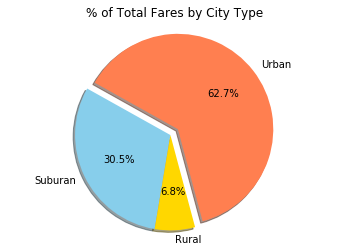

In [160]:
# Calculate fare Type Percents
#Urban is 62.7%, Suburban is 30.5%, Rural is 6.8%
# Total urban fare by sum price 
# if type == urban, sum of fare / total fare
#if type == Suburban, sum of fare / total fare
#if type == rural, sum of fare / total fare


total_price_df= pd.DataFrame(ride_data_two.groupby("city")["fare"].sum())

#merging the data set with total fare on each city
final_city_2_df = pd.merge(final_city_df, total_price_df, how='left',on='city')


#to show and plot pic chart with sample size according to % of total fares for different city type

#finding the dataframe to be for urban cities
urban2_df = pd.DataFrame(final_city_2_df[final_city_2_df['type'] == 'Urban'])

#finding the dataframe to be for Suburban cities
suburban2_df = pd.DataFrame(final_city_2_df[final_city_2_df['type'] == 'Suburban'])

#finding the dataframe to be for Rural cities
rural2_df = pd.DataFrame(final_city_2_df[final_city_2_df['type'] == 'Rural'])

#=====================================================================================
#urban price percent
urban_price_percent = (urban2_df["fare"].sum() /  final_city_2_df["fare"].sum()) * 100

#=====================================================================================
#Suburban price percent
suburban_price_percent = (suburban2_df["fare"].sum() /  final_city_2_df["fare"].sum()) * 100

#=====================================================================================
#Rural price percent
rural_price_percent = (rural2_df["fare"].sum() /  final_city_2_df["fare"].sum()) * 100


# Build Pie Chart


# Pie chart for % of Total Fares by City Type
city3 = ["Urban", "Suburan", "Rural"]
price1 = [urban_price_percent, suburban_price_percent, rural_price_percent]
colors = ["Coral", "SkyBlue", "Gold"]
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")
plt.pie(price1, explode=explode, labels=city3, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/totalfaresbycity.png")
plt.show()


In [161]:
final_city_2_df


,city,driver_count,type,num_rides,avg_fare,fare
0,Richardfort,38,Urban,28,22.373214,626.45
1,Williamsstad,59,Urban,23,24.362174,560.33
2,Port Angela,67,Urban,19,23.836842,452.90
3,Rodneyfort,34,Urban,23,28.616957,658.19
4,West Robert,39,Urban,31,25.123871,778.84
5,West Anthony,70,Urban,30,24.736667,742.10
6,West Angela,48,Urban,39,25.990000,1013.61
7,Martinezhaven,25,Urban,24,22.651250,543.63
8,Karenberg,22,Urban,17,26.340000,447.78
9,Barajasview,26,Urban,22,25.332273,557.31


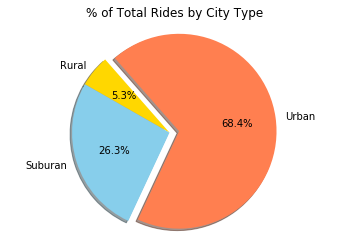

In [162]:
# Calculate Ride Percents
# total rides = final_city_2_df["num_rides"].sum()

#=====================================================================================
#urban price percent
urban_ride_percent = (urban2_df["num_rides"].sum() /  final_city_2_df["num_rides"].sum()) * 100

#=====================================================================================
#Suburban price percent
suburban_ride_percent = (suburban2_df["num_rides"].sum() /  final_city_2_df["num_rides"].sum()) * 100

#=====================================================================================
#Rural price percent
rural_ride_percent = (rural2_df["num_rides"].sum() /  final_city_2_df["num_rides"].sum()) * 100


# Pie chart for % of Total Rides by City Type
city2 = ["Urban", "Rural", "Suburan"]
ride2 = [urban_ride_percent, rural_ride_percent, suburban_ride_percent]
colors = ["Coral", "Gold", "SkyBlue"]
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type")
plt.pie(ride2, explode=explode, labels=city2, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=245)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/totalridesbycity.png")
plt.show()



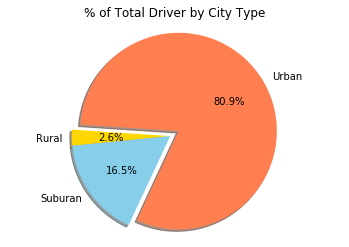

In [163]:
# Calculate Driver Count Percents
# total rides = final_city_2_df["driver_count"].sum()

#=====================================================================================
#urban price percent
urban_driver_percent = (urban2_df["driver_count"].sum() /  final_city_2_df["driver_count"].sum()) * 100

#=====================================================================================
#Suburban price percent
suburban_driver_percent = (suburban2_df["driver_count"].sum() /  final_city_2_df["driver_count"].sum()) * 100

#=====================================================================================
#Rural price percent
rural_driver_percent = (rural2_df["driver_count"].sum() /  final_city_2_df["driver_count"].sum()) * 100


# Pie chart for % of Total Rides by City Type
city1 = ["Urban", "Rural", "Suburan"]
driver1 = [urban_driver_percent, rural_driver_percent, suburban_driver_percent]
colors = ["Coral", "Gold", "SkyBlue"]
explode = (0.1, 0, 0)

plt.title("% of Total Driver by City Type")
plt.pie(driver1, explode=explode, labels=city1, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=245)
plt.axis("equal")

# Save Figure
plt.savefig("../Pyber/totaldriverbycity.png")
plt.show()




In [ ]:
#A written description of three observable trends based on the data.

#Based on the scatter plot data, the suburban city has the best overall price within the most appropiate number of rides
#Based on the pie chart, Urban has highest fares made overall but also have the highest number of drivers which means there are also alot of competition among other Urban drivers.
#Based on the pie chart, the number or rides collected in the Urban area has slightly more than 50% among other cities which means that drivers made a good amount of fare with a less amount of rides established.
#Conclusion, Urban has the highest chances of making good revenue with a considerable successful rides completed in terms of the market share between the city type. 

